**Part 1 ‐ Exploratory data analysis**
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [958]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import datetime
import warnings
warnings.filterwarnings('ignore')

In [959]:
#Read json file:
df= pd.read_json('logins.json')

In [960]:
#View file:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [962]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [963]:
df['month'], df['weekday'] =df['login_time'].dt.month, df['login_time'].dt.weekday

In [964]:
#Set log_in time as index:
df_login=df.set_index('login_time')

In [965]:
#Resample login time to every 15 minutedf_login['count'] = 1
df_login['count'] = 1
df_login = df_login.resample('15T').sum()  #log in count every 15 minutes
df_login = df_login.sort_values('count', ascending = False)#head()

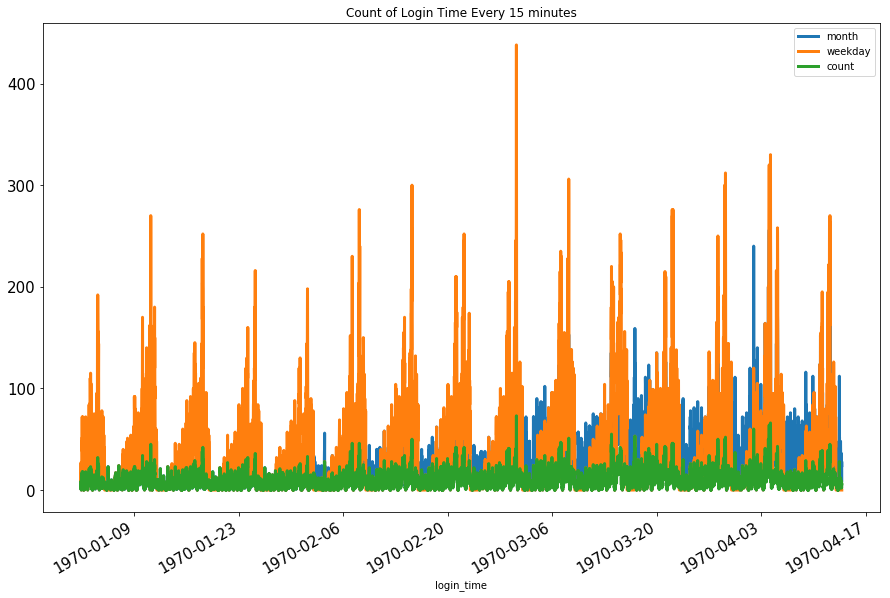

In [966]:
#Plot login time:
df_login.plot(figsize = (15,10), linewidth = 3, fontsize = 15)
_ = plt.title('Count of Login Time Every 15 minutes')

In [967]:
#Result: 
month = df_login.reset_index()
print(month.sort_values('count', ascending = False).head(1))

           login_time  month  weekday  count
0 1970-03-01 04:30:00    219      438     73


#### Observation: 
1. March 1, 1970 had maximum logins every 15 minutes 

In [968]:
#Let's look at monthly trend:

jan, feb, mar, apr = (df_login['1970-01-01': '1970-01-31'],
                      df_login['1970-02-01': '1970-02-28'],
                      df_login['1970-03-01': '1970-03-31'],
                      df_login['1970-04-01': '1970-04-30'])

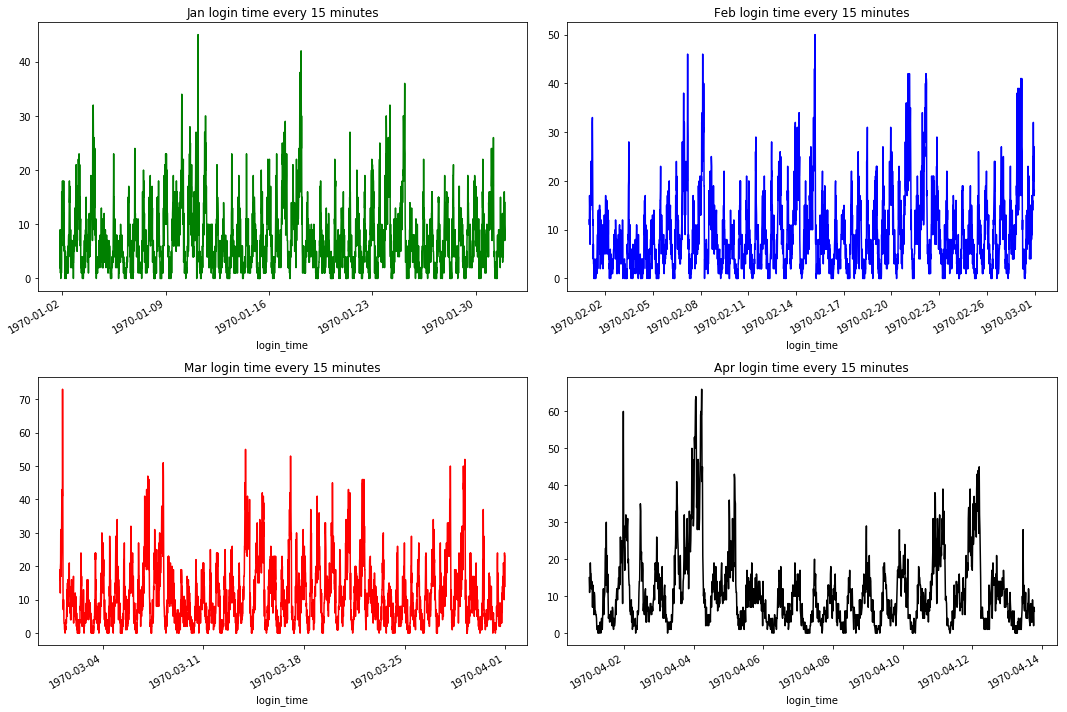

In [969]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
jan['count'].plot(color = 'green')
_ = plt.title('Jan login time every 15 minutes')
plt.subplot(2,2,2)
feb['count'].plot(color = 'blue')
_ = plt.title('Feb login time every 15 minutes')
plt.subplot(2,2,3)
mar['count'].plot(color = 'red')
_ = plt.title('Mar login time every 15 minutes')
plt.subplot(2,2,4)
apr['count'].plot(color = 'black')
_ = plt.title('Apr login time every 15 minutes')
plt.tight_layout()
plt.show()

In [970]:
#Reset Index: 
jan=jan.reset_index()
feb=feb.reset_index()
mar=mar.reset_index()
apr=apr.reset_index()
#sns.barplot(x = 'weekday', y = 'count', data = jan)

In [971]:
#Find weekdays for four months fron Jan to Apr:
jan['weekday'] =jan['login_time'].dt.weekday
feb['weekday'] =feb['login_time'].dt.weekday
mar['weekday'] =mar['login_time'].dt.weekday
apr['weekday'] =apr['login_time'].dt.weekday

In [972]:
#View
jan.head()

,login_time,month,weekday,count
0,1970-01-11 04:45:00,45,6,45
1,1970-01-18 04:15:00,42,6,42
2,1970-01-18 02:15:00,38,6,38
3,1970-01-25 04:45:00,36,6,36
4,1970-01-18 03:00:00,34,6,34


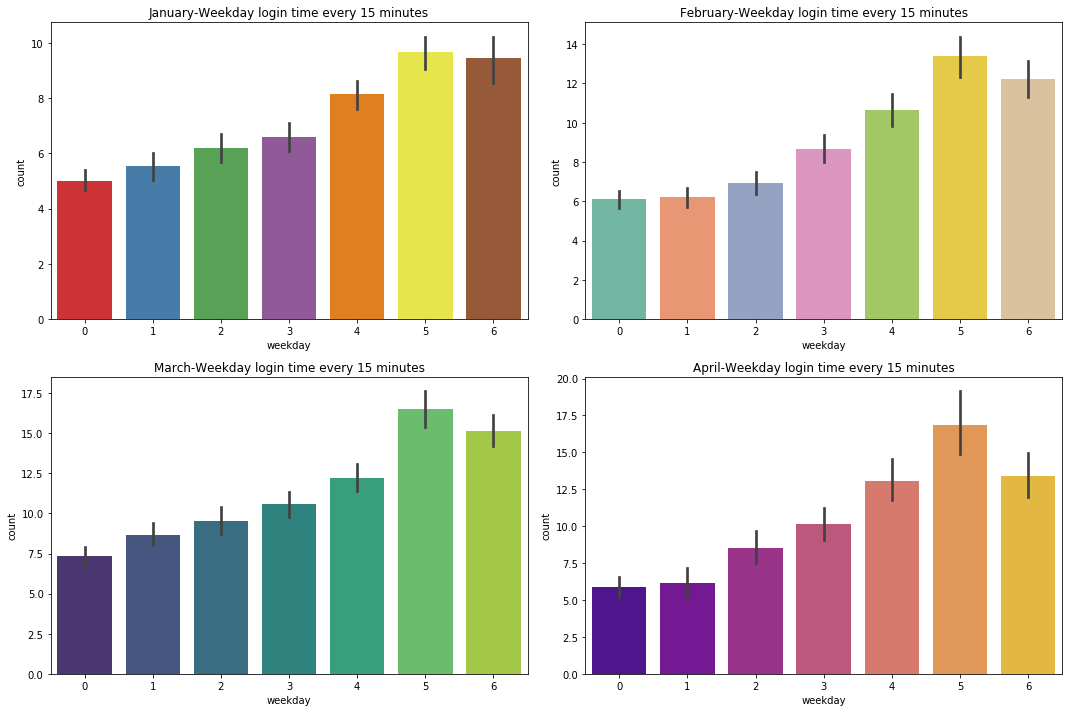

In [973]:
#Plot barplot from Jan to Apr:
_ = plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'weekday', y = 'count', data = jan, palette='Set1')
_ = plt.title('January-Weekday login time every 15 minutes')
plt.subplot(2,2,2)
sns.barplot(x = 'weekday', y = 'count', data = feb, palette= 'Set2')
_ = plt.title('February-Weekday login time every 15 minutes')
plt.subplot(2,2,3)
sns.barplot(x = 'weekday', y = 'count', data = mar, palette = 'viridis')
_ = plt.title('March-Weekday login time every 15 minutes')
plt.subplot(2,2,4)
sns.barplot(x = 'weekday', y = 'count', data = apr, palette = 'plasma')
_ = plt.title('April-Weekday login time every 15 minutes')
plt.tight_layout()
plt.show()

#### Observation: 
Weekday 5th had maximum count of logins

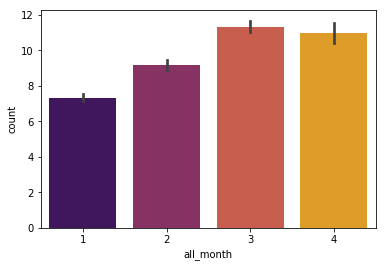

In [974]:
#All 4 months trend of login counts every 15 minutes:
df_login=df_login.reset_index()
df_login['all_month']=df_login['login_time'].dt.month
sns.barplot(x = 'all_month', y = 'count', data= df_login, palette='inferno')

#### Observation: 
1, Month of march accounted for maximum login counts.

**Part 2 ‐ Experiment and metrics design**
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Answer**: 
Beyond the cost of toll reimbursement, driver partners would want a strong demand for their services while they are servicing neigbouring city. It would be important to collect sample data first and then use hypothesis test to confirm their need of service during peak demand hours. Once, this is established, we can identify how many driver  By striking a balance between demand and availability and toll cost reimbursement, city riders should benefit greatly. 

**Part 3 ‐ Predictive modeling**
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

#### Data description
1. city: city this user signed up in
2. phone: primary device for this user
3. signup_date: date of account registration; in the form ‘YYYY MM DD’
4. last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
5. avg_dist: the average distance in miles per trip taken in the first 30 days after signup
6. avg_rating_by_driver: the rider’s average rating over all of their trips
6. avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
7. surge_pct: the percent of trips taken with surge multiplier > 1
8. avg_surge: The average surge multiplier over all of this user’s trips
9. trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
10. ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
11. weekday_pct: the percent of the user’s trips occurring during a weekday

In [975]:
file = open('ultimate_data_challenge.json', 'r')
rt = pd.DataFrame(json.load(file))
file.close()
rt.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [976]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [977]:
#Missing Value and Percentage
missing_value , missing_percentage = rt.isnull().sum(), rt.isnull().sum()/rt.shape[0]*100
missing_columns =pd.DataFrame(list(zip(missing_value , missing_percentage)), columns = ['missing_value', 'missing_percentage'])
rt_col = list(rt.columns) 
rt_col=pd.DataFrame(rt_col, columns = ['columns'])

In [978]:
missing_table  =pd.concat([rt_col, missing_columns], axis = 1)
missing_table

,columns,missing_value,missing_percentage
0,avg_dist,0,0.000
1,avg_rating_by_driver,201,0.402
2,avg_rating_of_driver,8122,16.244
3,avg_surge,0,0.000
4,city,0,0.000
5,last_trip_date,0,0.000
6,phone,396,0.792
7,signup_date,0,0.000
8,surge_pct,0,0.000
9,trips_in_first_30_days,0,0.000


In [979]:
#Fill missing values: 
def impute_median(dataframe, col):
    """ Returns missing values in a column with median"""
    return dataframe[col].fillna(dataframe[col].median())

In [980]:
#Replacing missing values with Median: 
rt['avg_rating_of_driver'] =  impute_median(rt, 'avg_rating_of_driver')
rt['avg_rating_by_driver'] = impute_median(rt, 'avg_rating_by_driver')


In [981]:
#Replacing missing phone information with mode:
print(rt['phone'].mode())
rt['phone'] = rt['phone'].replace(rt["phone"][(rt["phone"].isnull())==True], 'iPhone')

0    iPhone
dtype: object


In [982]:
#Verifying missing values filled: 
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [983]:
rt.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [984]:
#How much time elapsed since signup to last_trip_date?
rt['signup_date'] = pd.to_datetime(rt['signup_date'])
rt['last_trip_date'] = pd.to_datetime(rt['last_trip_date'])

rt['delta_lasttrip_signup_days'] = rt['last_trip_date']-rt['signup_date']
rt['delta_lasttrip_signup_days'] = rt['delta_lasttrip_signup_days'].dt.days
print('Maximum delta between last trip and signup date:',  rt['delta_lasttrip_signup_days'].max(), 'Days')

Maximum delta between last trip and signup date: 181 Days


In [985]:
rt.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,delta_lasttrip_signup_days
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47


In [986]:
#What is the trip activity like in the first 30 days since sign up?
trip_summary_first_30_days = rt.groupby(rt['delta_lasttrip_signup_days'][(rt['delta_lasttrip_signup_days']<=30) == True])['trips_in_first_30_days'].agg({'trip_summary_first_30_days': ['min', 'max', 'count']})

In [987]:
#What is the trip activity like after 30 days since sign up?
trip_summary_after_30_days = rt.groupby(rt['delta_lasttrip_signup_days'][(rt['delta_lasttrip_signup_days']>30) == True])['trips_in_first_30_days'].agg({'trip_summary_after_30_days': ['min', 'max', 'count']})

In [988]:
print('Trip summary first few days after sign up and few days after a month of sign \n:',trip_summary_first_30_days.head(), '\n', trip_summary_after_30_days.head())
print('Summary Statistics:\n',trip_summary_first_30_days.describe(),'\n', trip_summary_after_30_days.describe())

Trip summary first few days after sign up and few days after a month of sign 
:                            trip_summary_first_30_days          
                                                  min max count
delta_lasttrip_signup_days                                     
0.0                                                 1   5  2302
1.0                                                 1   7  4374
2.0                                                 1  11  1063
3.0                                                 1  17   595
4.0                                                 1  17   433 
                            trip_summary_after_30_days          
                                                  min max count
delta_lasttrip_signup_days                                     
31.0                                                0  17   111
32.0                                                0  16   106
33.0                                                0  12   106
34.0                  

#### Observation: 
1. Same day, out of 2302 trips, maximum last trips taken were 5 while minimum was 1. 
2. On 31st day, out of 111 trips, maximum last trips taken were 17 while minimum was 0. 

This shows that after 30 days of sign up minimum trip activity was zero and likely all trips were taken during the first 30 days after sign up.  
This will be an important indicator for ultimate to plan their marketing initiatives as well as do resource management. 

#### What fraction of user were retained in the last 30 days? 

In [989]:

#Period ended: 
rt['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [990]:
fraction_retained = (rt['last_trip_date'] >= '2014-06-01').sum()/ (rt['last_trip_date'] >= '2014-06-01').count()

In [991]:
print("Percent Retained:",round(fraction_retained *100,2))

Percent Retained: 37.61


In [992]:
#Create new column user retained: 

rt['user_retained'] = (rt['last_trip_date'] >= '2014-06-01') *1

In [993]:
rt.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,delta_lasttrip_signup_days,user_retained
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,60.926084,92.790100,0.376080
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,37.081503,62.129822,0.484405
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,110.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000


#### Correlation between input features:

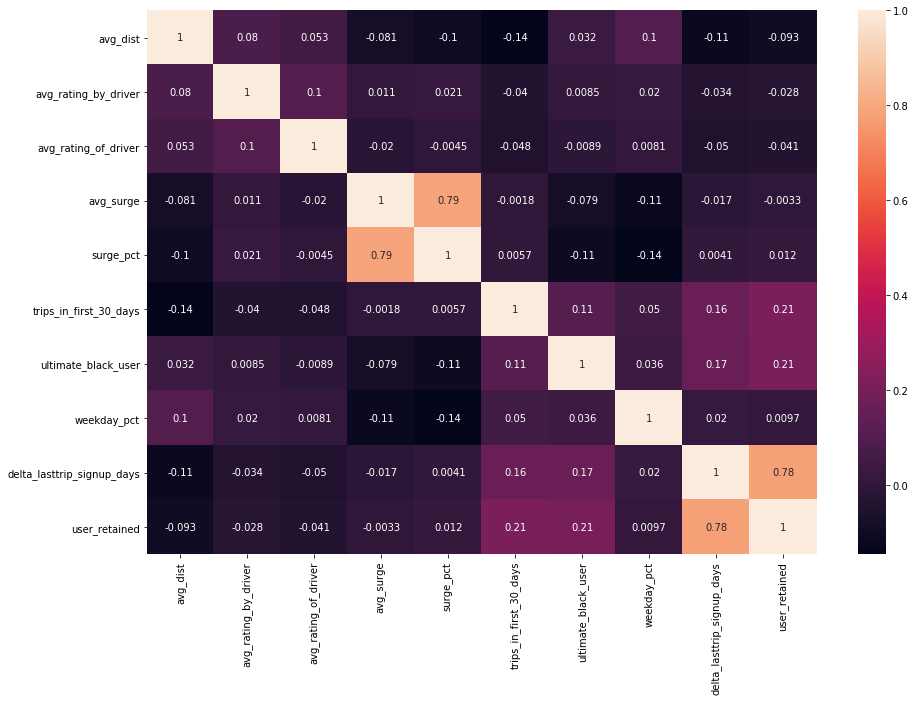

In [994]:
_ = plt.figure(figsize = (15,10))
sns.heatmap(rt.corr(), annot = True)

#### Observation: 
1. avg_surge is positively correlated to surge_pct
2. Delta_lasttrip_signup_days is correlated to user_retained. 

In [995]:
rt.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,delta_lasttrip_signup_days,user_retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47,0


#### Data Visualization

In [996]:
#Phone users per city:
phone_users_city = rt.groupby('phone')['city'].value_counts().unstack()#

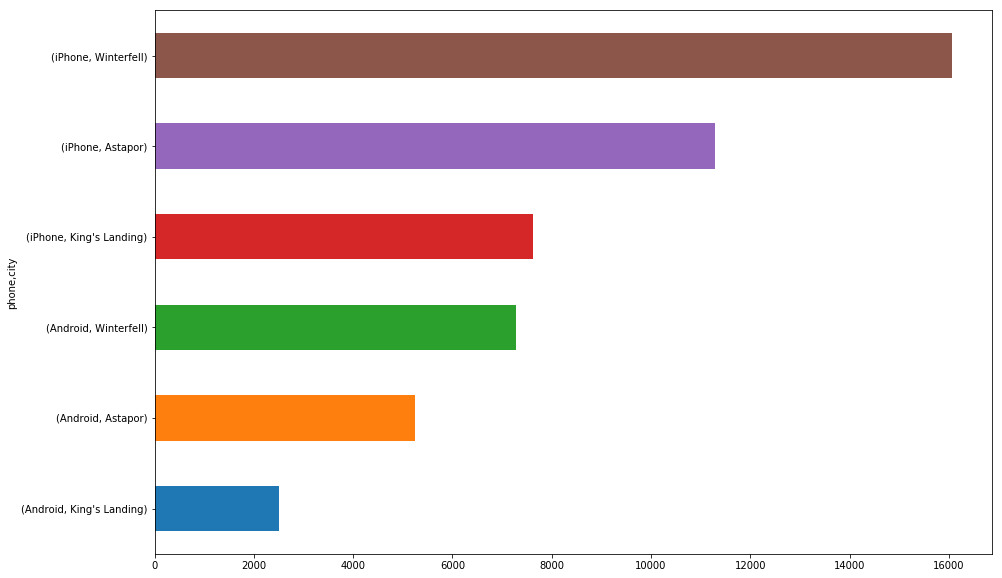

In [997]:
phone_users_city.stack().sort_values(ascending = True).plot('barh', figsize = (15,10))

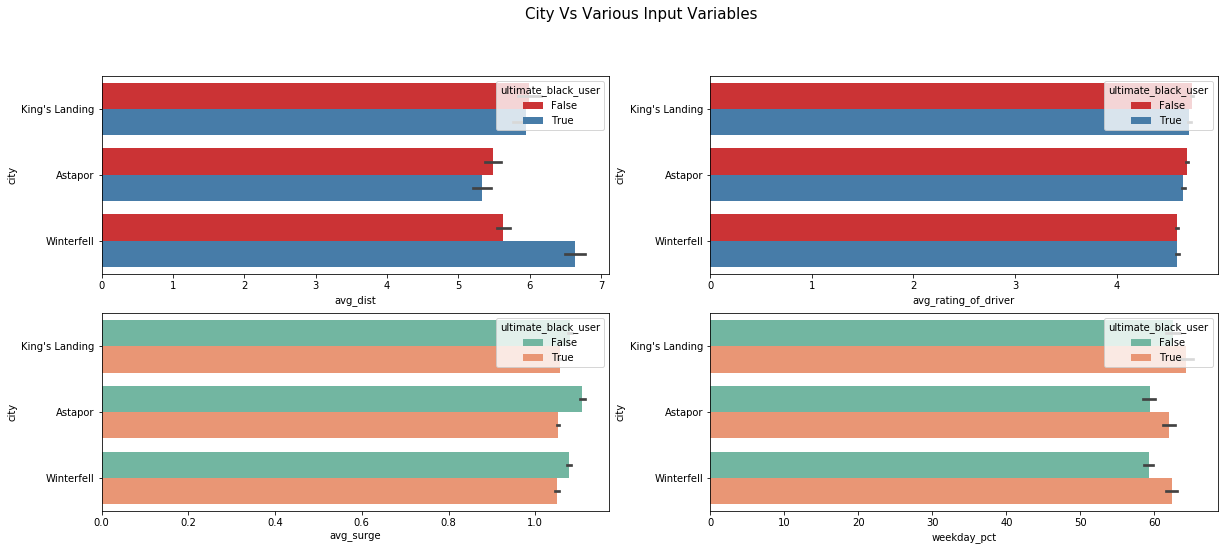

In [998]:
_ = plt.figure(figsize = (20,8))
_ = plt.suptitle("City Vs Various Input Variables\n", y=1, fontsize = 15)
plt.subplot(2,2,1)
sns.barplot(x = 'avg_dist', y = 'city', data = rt, hue = 'ultimate_black_user', palette='Set1')
_ = plt.legend(title = 'ultimate_black_user',loc = 'upper right')

plt.subplot(2,2,2)
sns.barplot(x = 'avg_rating_of_driver', y = 'city', data = rt, hue = 'ultimate_black_user', palette='Set1')
_ = plt.legend(title = 'ultimate_black_user',loc = 'upper right')

plt.subplot(2,2,3)            
sns.barplot(x = 'avg_surge', y = 'city', data = rt, hue = 'ultimate_black_user', palette='Set2')
_ = plt.legend(title = 'ultimate_black_user',loc = 'upper right')

plt.subplot(2,2,4)             
sns.barplot(x = 'weekday_pct', y = 'city', data = rt, hue = 'ultimate_black_user', palette='Set2')
_ = plt.legend(title = 'ultimate_black_user',loc = 'upper right')

#### Observation: 
1. iphone winterfell had highest users.
2. Average distance traveled by Ultimate black users in Winterfell is higher.
3. Average Rating of driver is highest in King's Landing.
4. Astapor recorded highest average surge for white users.
5. Weekday percent change was highest in King's landing for black users.  

#### Predictive Modeling: 

In [999]:
rt.info()
print(rt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                      50000 non-null float64
avg_rating_by_driver          50000 non-null float64
avg_rating_of_driver          50000 non-null float64
avg_surge                     50000 non-null float64
city                          50000 non-null object
last_trip_date                50000 non-null datetime64[ns]
phone                         50000 non-null object
signup_date                   50000 non-null datetime64[ns]
surge_pct                     50000 non-null float64
trips_in_first_30_days        50000 non-null int64
ultimate_black_user           50000 non-null bool
weekday_pct                   50000 non-null float64
delta_lasttrip_signup_days    50000 non-null int64
user_retained                 50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2)
memory usage: 5.0+ MB
(50000, 14)


In [1008]:
#Drop columns: 
drop_col = ['last_trip_date', 'signup_date', 'surge_pct', 'delta_lasttrip_signup_days']

rt_drop =rt.drop(columns=drop_col, axis =1)

In [1009]:
rt_drop.shape

(50000, 10)

In [1010]:
#Convert categorical values to numeric: 
cat_col = ['city', 'phone', 'ultimate_black_user']

rt_model =pd.get_dummies(data = rt_drop, columns = cat_col, drop_first=True)

In [1011]:
rt_model.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,trips_in_first_30_days,weekday_pct,user_retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,3,100.0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,14,82.4,0,0,1,0,0


In [897]:
#rt_model =pd.concat([rt_drop, rt_cat],axis =1).drop(cat_col, axis =1)
#rt_model.head()

In [1012]:
X = rt_model.drop('user_retained', axis =1)
y = rt_model['user_retained']

In [1013]:
 X.shape, y.shape

((50000, 10), (50000,))

In [1258]:
#Import Packages: 

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [1095]:
nl = StandardScaler()
X_std = nl.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.2, random_state =123)

In [1096]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 10), (10000, 10), (40000,), (10000,))

#### Logistics Regression: 

In [1176]:
#Initiate
lr = LogisticRegression(random_state = 12)

#Grid search:
param = {'penalty': ['l1','l2']}  # l1 lasso regularization
                                  #l2 ridge regularization  
gr_lr = GridSearchCV(lr, param_grid=param, cv = 5)

#Find best parameter:
gr_lr.fit(X_train,y_train)

print(gr_lr.best_params_)

#Apply tuned model to predict:
y_pred_lr = gr_lr.predict(X_test)

y_pred_lr_prob = lr_tuned.predict_proba(X_test)[:,1] #Probability of user_retained class 1


{'penalty': 'l1'}


In [1177]:
#Evaluate:
print('Classification Report Logistics Regression:\n',classification_report(y_test, y_pred_lr))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_lr))
print('Accuracy Score:', accuracy_score(y_test, y_pred_lr))

Classification Report Logistics Regression:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      6218
           1       0.67      0.49      0.56      3782

   micro avg       0.72      0.72      0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.70     10000

Confusion Matrix:
 [[5322  896]
 [1946 1836]]
Accuracy Score: 0.7158


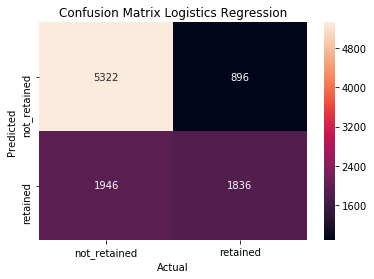

In [1207]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), 
            annot = True, fmt='d',
            xticklabels=['not_retained', 'retained'], #0-not_retained, 1-retained
            yticklabels=['not_retained', 'retained'])
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Confusion Matrix Logistics Regression')

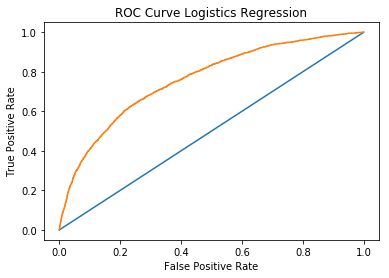

In [1290]:
#AUC, ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_prob)

_ = plt.plot([0,1], [0,1])
_ = plt.plot(fpr, tpr)
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve Logistics Regression')

In [1289]:
print('Area Under the Curve:',roc_auc_score(y_test, y_pred_lr_prob)) 

Area Under the Curve: 0.7601089763619344


#### Support Vector Machine:

In [1199]:
#Initiate
svc = SVC(random_state= 12)  # use svc.get_params().keys() to get keys for hyper parameter tuning

#Grid Search:
param = {"C" : [0.01,1], 'gamma': [1,0.1]} #trying with default 'rfb
                                           #kernel': ['poly', 'linear', 'rfb'])
gs_svc = GridSearchCV(svc, param_grid=param, cv = 5, verbose=3) 

#Find best parameters
gs_svc.fit(X_train,y_train)
print(gs_svc.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=0.01, gamma=1, score=0.6741657292838396, total=  22.6s
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.8s remaining:    0.0s


[CV] ........ C=0.01, gamma=1, score=0.6737907761529809, total=  22.8s
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] ................... C=0.01, gamma=1, score=0.67425, total=  23.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........ C=0.01, gamma=1, score=0.6762095261907739, total=  24.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ........ C=0.01, gamma=1, score=0.6768346043255407, total=  23.4s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.7316585426821647, total=  20.1s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.7362829646294213, total=  20.4s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................ C=0.01, gamma=0.1, score=0.736125, total=  20.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ...... C=0.01, gamma=0.1, score=0.7342167770971372, total=  20.5s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 12.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 1], 'gamma': [1, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

**Best Parameters SVM**: 
{'C': 1, 'gamma': 0.1}

In [1211]:
#Apply tuned model to predict: 
y_pred_svc = gs_svc.predict(X_test)

In [1205]:
#Evaluate:
print('Classification Report SVM:\n',classification_report(y_test, y_pred_svc))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_svc))
print('Accuracy Score:', accuracy_score(y_test, y_pred_svc))

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      6218
           1       0.73      0.60      0.66      3782

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.75      0.73      0.74     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix:
 [[5371  847]
 [1520 2262]]
Accuracy Score: 0.7633


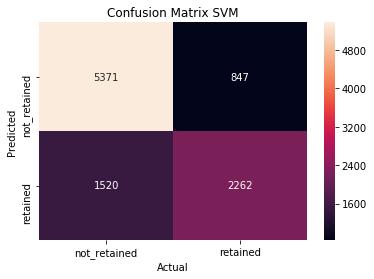

In [1208]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), 
            annot = True, fmt='d',
            xticklabels=['not_retained', 'retained'], #0-not_retained, 1-retained
            yticklabels=['not_retained', 'retained'])
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Confusion Matrix SVM')

#### Random Forest Classifier

In [1239]:
#Initiate
rf = RandomForestClassifier(random_state=12)
print(rf.get_params())

#Random Search:
param = {'n_estimators': [100, 200], 'criterion': ['gini', 'entropy'], 'max_features': [2,5,10], "min_samples_split": [2, 5], "min_samples_leaf": [1, 2, 4] }
rs_rf = RandomizedSearchCV(rf, param_distributions = param, cv = 5, verbose=3)

#Find Best Parameters:
rf_model = rs_rf.fit(X_train, y_train)
print(rf_model.best_params_)


{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy, score=0.7732783402074741, total=  11.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.2s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy, score=0.762779652543432, total=  11.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.8s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy, score=0.775125, total=  11.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy, score=0.766345793224153, total=  11.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=entropy, score=0.7749718714839355, total=  10.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=2, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=2, criterion=entropy, score=0.778527684039495, total=   3.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=2, criterion=entropy 
[CV]  n_estimators=200, min_samples_split=5, min_sa

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=gini, score=0.77075, total=   5.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=gini, score=0.7635954494311789, total=   5.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=10, criterion=gini, score=0.7769721215151894, total=   4.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=5, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=5, criterion=gini, score=0.7514060742407199, total=   3.2s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_features=5, criterion=gini 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_featu

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.1min finished


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 2, 'criterion': 'gini'}


**Best Parameters from Random Search**

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 2, 'criterion': 'gini'}

In [1250]:
#Apply grid serach to refine random search parameters:
param = {'n_estimators': [100,200], 'min_samples_split': [2,3], 'min_samples_leaf': [4,5], 'max_features': [2,3]}
gs_rf = GridSearchCV(rf, param_grid=param, cv = 5, verbose = 3)
rf_tuned =gs_rf.fit(X_train, y_train)
print(rf_tuned.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.7841519810023747, total=   1.6s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.7742782152230971, total=   1.5s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.78275, total=   1.5s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.7770971371421428, total=   1.5s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.7830978872359045, total=   1.6s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7847769028871391, total=   3.1s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7714035745531809, total=   3.2s
[CV] max_features=2, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  

[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.7804725590698838, total=   1.9s
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7825271841019873, total=   4.0s
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7735283089613798, total=   3.9s
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.782375, total=   3.8s
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.7749718714839355, total=   4.0s
[CV] max_features=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV] 

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.3min finished


{'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200}


**Grid serach best parameters**
{'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200}

In [1259]:
#Fit tuned model to predict: 
y_pred_rf = rf_tuned.predict(X_test)
y_pred_rf_prob = rf_tuned.predict_proba(X_test)[:,1]

In [1260]:
#Evaluate:
print('Classification Report Random Forest:\n',classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      6218
           1       0.74      0.64      0.69      3782

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.77      0.75      0.76     10000
weighted avg       0.78      0.78      0.78     10000

Confusion Matrix:
 [[5364  854]
 [1345 2437]]
Accuracy Score: 0.7801


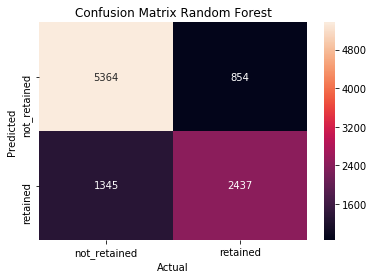

In [1261]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), 
            annot = True, fmt='d',
            xticklabels=['not_retained', 'retained'], #0-not_retained, 1-retained
            yticklabels=['not_retained', 'retained'])
_ = plt.xlabel('Actual')
_ = plt.ylabel('Predicted')
_ = plt.title('Confusion Matrix Random Forest')

0.8465544327304821


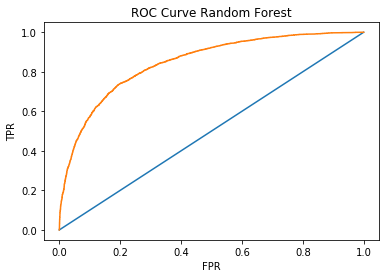

In [1287]:
#ROCAUC Curve:

fpr,tpr, thresholds = roc_curve(y_test, y_pred_rf_prob)
_ = plt.plot([0,1], [0,1])
_ = plt.plot(fpr,tpr)
_ = plt.xlabel('FPR')
_ = plt.ylabel('TPR')
_ = plt.title('ROC Curve Random Forest')

print(roc_auc_score(y_test, y_pred_rf_prob))

In [1275]:
#Refit rf parameters obtained from grid serach to find feature imporatnce:
rf_parameter = RandomForestClassifier(max_features= 2,
                                      min_samples_leaf= 5,
                                      min_samples_split= 3,
                                      n_estimators= 200,
                                      random_state = 12)
rf_parameter.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

Top 5 Features used in classifying user_retention:
                       Feature_importance
Columns                                 
avg_rating_by_driver            0.176949
last_trip_date                  0.157316
avg_dist                        0.153666
phone                           0.113649
avg_surge                       0.112951


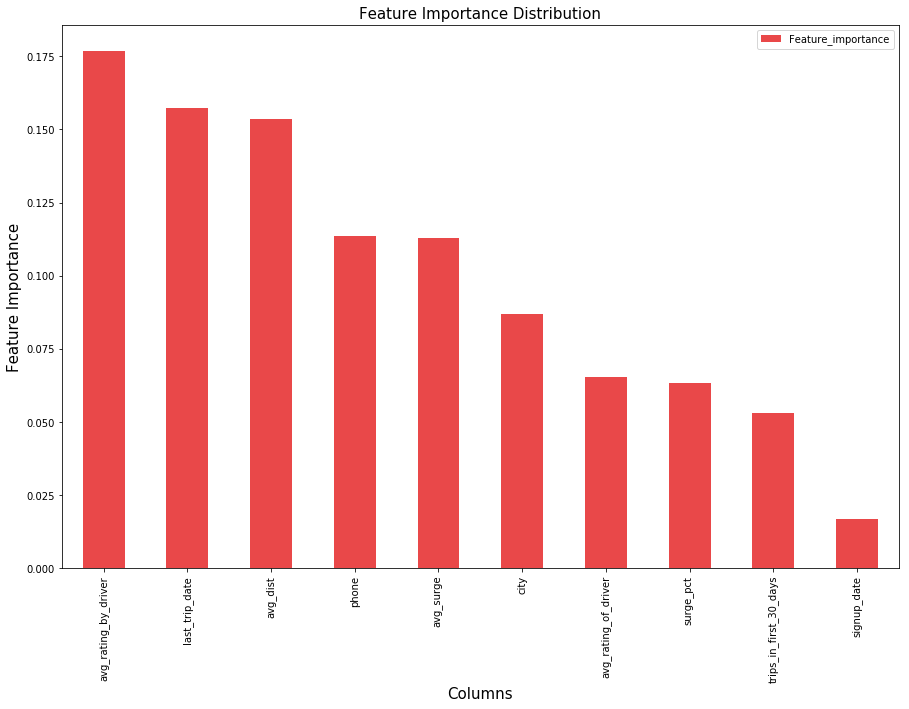

In [1293]:
feature_importance = pd.DataFrame(list(zip(rt.columns,rf_parameter.feature_importances_)), columns = ['Columns', 'Feature_importance'])
print('Top 5 Features used in classifying user_retention:\n', feature_importance.set_index('Columns').sort_values('Feature_importance', ascending= False).head())
feature_importance.set_index('Columns').sort_values('Feature_importance', ascending= False).plot.bar(cmap = 'Set1', figsize = (15,10), alpha = 0.8)
_ = plt.xlabel('Columns', fontsize = 15)
_ = plt.ylabel('Feature Importance', fontsize = 15)
_ = _ = plt.title('Feature Importance Distribution', fontsize = 15)


#### Conclusion: 
1. Out of 3 models, Random forest performed best. It classified user retention with 78% accuracy and ROC AUC Score of 84.6%. 
2. Average Rating by Driver is one of the most important feature in classifying user_retention.